In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import datetime


%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
#read in file
uber2015 = pd.read_csv('D:\\Projects\\Uber Data Analysis & Visualization\\uber-raw-data-janjune-15.csv')

In [3]:
#browsing dataset
uber2015.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [4]:
#number of rows in the dataset
len(uber2015)

14270479

In [5]:
#Checking the minimum date in the dataset
uber2015['Pickup_date'].min()

'2015-01-01 00:00:05'

In [6]:
#Checking the maximum date in the dataset
uber2015['Pickup_date'].max()

'2015-06-30 23:59:00'

In [7]:
#converting Pickup_date column to datetime 
uber2015['Pickup_date'] =  pd.to_datetime(uber2015['Pickup_date'], format='%Y-%m-%d %H:%M:%S')
#extracting the Hour from Pickup_date column and putting it into a new column named 'Hour'
uber2015['Hour'] = uber2015.Pickup_date.apply(lambda x: x.hour)
#extracting the Minute from Pickup_date column and putting it into a new column named 'Minute'
uber2015['Minute'] = uber2015.Pickup_date.apply(lambda x: x.minute)
#extracting the Month from Pickup_date column and putting it into a new column named 'Month'
uber2015['Month'] = uber2015.Pickup_date.apply(lambda x: x.month)
#extracting the Day from Pickup_date column and putting it into a new column named 'Day'
uber2015['Day'] = uber2015.Pickup_date.apply(lambda x: x.day)

In [8]:
#browse updated dataset
uber2015.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Hour,Minute,Month,Day
0,B02617,2015-05-17 09:47:00,B02617,141,9,47,5,17
1,B02617,2015-05-17 09:47:00,B02617,65,9,47,5,17
2,B02617,2015-05-17 09:47:00,B02617,100,9,47,5,17
3,B02617,2015-05-17 09:47:00,B02774,80,9,47,5,17
4,B02617,2015-05-17 09:47:00,B02617,90,9,47,5,17


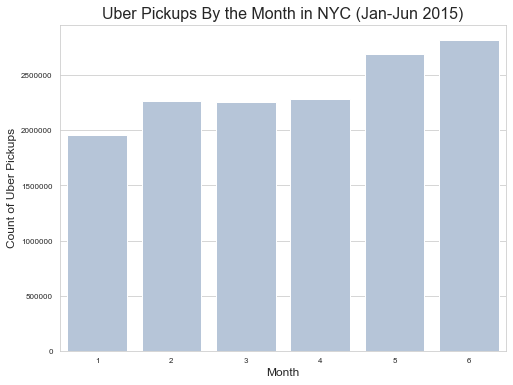

In [9]:
# Uber pickups by the month in NYC
sns.set_style('whitegrid')
ax = sns.countplot(x="Month", data=uber2015, color="lightsteelblue")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Uber Pickups By the Month in NYC (Jan-Jun 2015)', fontsize=16)
ax.tick_params(labelsize = 8)
plt.show()

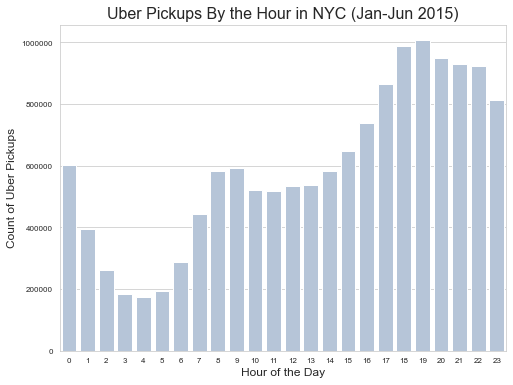

In [10]:
# Uber pickups by the hour in NYC
sns.set_style('whitegrid')
ax = sns.countplot(x="Hour", data=uber2015, color="lightsteelblue")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Hour of the Day', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Uber Pickups By the Hour in NYC (Jan-Jun 2015)', fontsize=16)
ax.tick_params(labelsize = 8)
plt.show()

In [11]:
uber2015['Weekday'] = uber2015.Pickup_date.apply(lambda x: x.strftime('%A'))

In [12]:
uber2015.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Hour,Minute,Month,Day,Weekday
0,B02617,2015-05-17 09:47:00,B02617,141,9,47,5,17,Sunday
1,B02617,2015-05-17 09:47:00,B02617,65,9,47,5,17,Sunday
2,B02617,2015-05-17 09:47:00,B02617,100,9,47,5,17,Sunday
3,B02617,2015-05-17 09:47:00,B02774,80,9,47,5,17,Sunday
4,B02617,2015-05-17 09:47:00,B02617,90,9,47,5,17,Sunday


In [13]:
#group the data by Weekday and hour
summary = uber2015.groupby(['Weekday', 'Hour'])['Pickup_date'].count()

In [14]:
#reset index
summary = summary.reset_index()
#convert to dataframe
summary = pd.DataFrame(summary)
#browse data
summary.head()

,Weekday,Hour,Pickup_date
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575


In [15]:
#rename last column
summary=summary.rename(columns = {'Pickup_date':'Counts'})

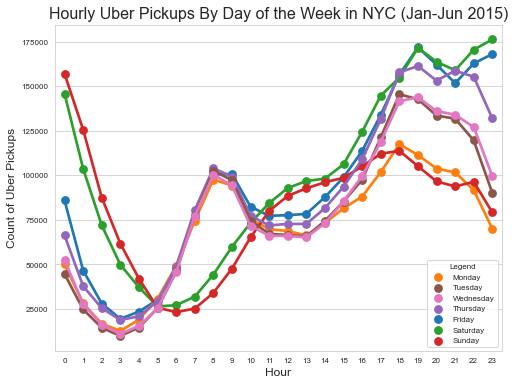

In [16]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="Hour", y="Counts", hue="Weekday", data=summary)
handles,labels = ax.get_legend_handles_labels()
#reordering legend content
handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]]
labels = [labels[1], labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Hour', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Hourly Uber Pickups By Day of the Week in NYC (Jan-Jun 2015)', fontsize=16)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc=0, title="Legend", prop={'size':8})
ax.get_legend().get_title().set_fontsize('8')
plt.show()